In [1]:

import pandas as pd

In [2]:
user_data = pd.read_csv('user_data.csv')
user_data.head()

,user_id,gender,age,country,city,exp_group,os,source
0,200,1,34,Russia,Degtyarsk,3,Android,ads
1,201,0,37,Russia,Abakan,0,Android,ads
2,202,1,17,Russia,Smolensk,4,Android,ads
3,203,0,18,Russia,Moscow,1,iOS,ads
4,204,0,36,Russia,Anzhero-Sudzhensk,3,Android,ads


In [3]:
post_data = pd.read_csv('post_data.csv')
post_data.head()

,post_id,text,topic
0,1,UK economy facing major risks\n\nThe UK manufa...,business
1,2,Aids and climate top Davos agenda\n\nClimate c...,business
2,3,Asian quake hits European shares\n\nShares in ...,business
3,4,India power shares jump on debut\n\nShares in ...,business
4,5,Lacroix label bought by US firm\n\nLuxury good...,business


In [4]:
feed = pd.read_csv('feed_data.csv')
feed.head()

,timestamp,user_id,post_id,action,target
0,2021-12-17 20:59:19,164105,5718,like,0
1,2021-12-17 20:59:21,164105,3406,view,0
2,2021-12-17 20:59:53,164105,5483,view,0
3,2021-12-17 21:00:10,164105,2604,view,0
4,2021-12-17 21:01:57,164105,6042,view,0


In [5]:
feed[feed.action!='view']

,timestamp,user_id,post_id,action,target
0,2021-12-17 20:59:19,164105,5718,like,0
15,2021-12-17 21:19:39,164105,150,like,0
25,2021-12-27 19:17:40,164105,6096,like,0
32,2021-12-27 19:26:53,164105,2748,like,0
43,2021-12-27 19:41:28,164105,2430,like,0
...,...,...,...,...,...
9999900,2021-11-13 11:19:37,67787,75,like,0
9999922,2021-11-18 19:22:59,67787,5798,like,0
9999977,2021-11-12 15:10:30,31043,6553,like,0
9999993,2021-11-20 15:08:24,31043,6198,like,0


In [6]:
feed[feed.target==1]

,timestamp,user_id,post_id,action,target
14,2021-12-17 21:19:07,164105,150,view,1
24,2021-12-27 19:15:58,164105,6096,view,1
31,2021-12-27 19:26:11,164105,2748,view,1
42,2021-12-27 19:40:32,164105,2430,view,1
48,2021-12-08 20:01:45,29615,334,view,1
...,...,...,...,...,...
9999899,2021-11-13 11:17:58,67787,75,view,1
9999921,2021-11-18 19:21:53,67787,5798,view,1
9999976,2021-11-12 15:09:10,31043,6553,view,1
9999992,2021-11-20 15:05:54,31043,6198,view,1


In [7]:
### Как можно заметить, строки со значением 'like' в колонке 'action' почти полностью дублируют строки со значением 1
### в колонке 'target'. Т.е. если target==1, значит ползователь лайкнул пост.
### Поэтому строки со значением like можно удалить

feed = feed[feed.action=='view']

feed.head()

,timestamp,user_id,post_id,action,target
1,2021-12-17 20:59:21,164105,3406,view,0
2,2021-12-17 20:59:53,164105,5483,view,0
3,2021-12-17 21:00:10,164105,2604,view,0
4,2021-12-17 21:01:57,164105,6042,view,0
5,2021-12-17 21:04:08,164105,7062,view,0


Для рекомендации постов пользователям используем контентный подход.

Для выбранной даты timestamp и для всех пар user_id, post_id
будем предсказывать вероятность лайка

In [8]:
### для пользователей оставлю все фичи, которые есть в датасете

user_data.head()

,user_id,gender,age,country,city,exp_group,os,source
0,200,1,34,Russia,Degtyarsk,3,Android,ads
1,201,0,37,Russia,Abakan,0,Android,ads
2,202,1,17,Russia,Smolensk,4,Android,ads
3,203,0,18,Russia,Moscow,1,iOS,ads
4,204,0,36,Russia,Anzhero-Sudzhensk,3,Android,ads


In [9]:
### для постов оставим топик, а текст попробую обработать

post_data.head()

,post_id,text,topic
0,1,UK economy facing major risks\n\nThe UK manufa...,business
1,2,Aids and climate top Davos agenda\n\nClimate c...,business
2,3,Asian quake hits European shares\n\nShares in ...,business
3,4,India power shares jump on debut\n\nShares in ...,business
4,5,Lacroix label bought by US firm\n\nLuxury good...,business


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

In [11]:
tfidf_posts = (tfidf.fit_transform(post_data['text']).toarray())

In [12]:
tfidf_posts = pd.DataFrame(
    tfidf_posts,
    index=post_data.post_id,
    columns=tfidf.get_feature_names_out()
)

tfidf_posts.head()

,00,000,0001,000bn,000m,000s,000th,001,001and,001st,...,𝓫𝓮,𝓫𝓮𝓽𝓽𝓮𝓻,𝓬𝓸𝓾𝓻𝓽𝓼,𝓱𝓮𝓪𝓻𝓲𝓷𝓰,𝓶𝓪𝔂,𝓹𝓱𝔂𝓼𝓲𝓬𝓪𝓵,𝓼𝓸𝓸𝓷𝓮𝓻,𝓼𝓾𝓫𝓸𝓻𝓭𝓲𝓷𝓪𝓽𝓮,𝓽𝓱𝓮,𝓽𝓸
post_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.132191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.050398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
### Генерю фичи на основе TfIdf

post_data['TotalTfIdf'] = tfidf_posts.sum(axis=1).reset_index()[0]
post_data['MaxTfIdf'] = tfidf_posts.max(axis=1).reset_index()[0]
post_data['MeanTfIdf'] = tfidf_posts.mean(axis=1).reset_index()[0]

post_data.head()

,post_id,text,topic,TotalTfIdf,MaxTfIdf,MeanTfIdf
0,1,UK economy facing major risks\n\nThe UK manufa...,business,9.198863,0.499797,0.000179
1,2,Aids and climate top Davos agenda\n\nClimate c...,business,12.305151,0.306730,0.000239
2,3,Asian quake hits European shares\n\nShares in ...,business,13.203359,0.275247,0.000256
3,4,India power shares jump on debut\n\nShares in ...,business,7.064717,0.551670,0.000137
4,5,Lacroix label bought by US firm\n\nLuxury good...,business,6.772273,0.424172,0.000131


In [14]:
### сохраняю таблицу с фичами постов
#post_data.to_csv('post_with_tfidf.csv', index=False)

In [15]:
#post_data = pd.read_csv('post_with_tfidf.csv')

In [16]:
### объединяю таблицу со взаимодействиями с фичами постов и пользователей

df = pd.merge(feed, post_data, on='post_id', how='left')

df.head()

,timestamp,user_id,post_id,action,target,text,topic,TotalTfIdf,MaxTfIdf,MeanTfIdf
0,2021-12-17 20:59:21,164105,3406,view,0,The secondary effects of #COVID19 in #Iraq - b...,covid,3.389669,0.450505,0.000066
1,2021-12-17 20:59:53,164105,5483,view,0,I bought a DVD collection (9 movies for 10 Eur...,movie,6.665758,0.350701,0.000129
2,2021-12-17 21:00:10,164105,2604,view,0,"Everyone Be careful, dont think that we will n...",covid,3.011611,0.461670,0.000058
3,2021-12-17 21:01:57,164105,6042,view,0,The world is made up two different types of mo...,movie,6.913636,0.297125,0.000134
4,2021-12-17 21:04:08,164105,7062,view,0,When a film has no fewer than FIVE different t...,movie,10.827568,0.370920,0.000210


In [17]:
df = pd.merge(df, user_data, on='user_id', how='left')

df.head()

,timestamp,user_id,post_id,action,target,text,topic,TotalTfIdf,MaxTfIdf,MeanTfIdf,gender,age,country,city,exp_group,os,source
0,2021-12-17 20:59:21,164105,3406,view,0,The secondary effects of #COVID19 in #Iraq - b...,covid,3.389669,0.450505,0.000066,1,14,Russia,Omsk,1,Android,organic
1,2021-12-17 20:59:53,164105,5483,view,0,I bought a DVD collection (9 movies for 10 Eur...,movie,6.665758,0.350701,0.000129,1,14,Russia,Omsk,1,Android,organic
2,2021-12-17 21:00:10,164105,2604,view,0,"Everyone Be careful, dont think that we will n...",covid,3.011611,0.461670,0.000058,1,14,Russia,Omsk,1,Android,organic
3,2021-12-17 21:01:57,164105,6042,view,0,The world is made up two different types of mo...,movie,6.913636,0.297125,0.000134,1,14,Russia,Omsk,1,Android,organic
4,2021-12-17 21:04:08,164105,7062,view,0,When a film has no fewer than FIVE different t...,movie,10.827568,0.370920,0.000210,1,14,Russia,Omsk,1,Android,organic


In [18]:
### выношу час когда происходит взаимодействие в отдельную колонку

df['hour'] = pd.to_datetime(df['timestamp']).apply(lambda x: x.hour)

df.head()

,timestamp,user_id,post_id,action,target,text,topic,TotalTfIdf,MaxTfIdf,MeanTfIdf,gender,age,country,city,exp_group,os,source,hour
0,2021-12-17 20:59:21,164105,3406,view,0,The secondary effects of #COVID19 in #Iraq - b...,covid,3.389669,0.450505,0.000066,1,14,Russia,Omsk,1,Android,organic,20
1,2021-12-17 20:59:53,164105,5483,view,0,I bought a DVD collection (9 movies for 10 Eur...,movie,6.665758,0.350701,0.000129,1,14,Russia,Omsk,1,Android,organic,20
2,2021-12-17 21:00:10,164105,2604,view,0,"Everyone Be careful, dont think that we will n...",covid,3.011611,0.461670,0.000058,1,14,Russia,Omsk,1,Android,organic,21
3,2021-12-17 21:01:57,164105,6042,view,0,The world is made up two different types of mo...,movie,6.913636,0.297125,0.000134,1,14,Russia,Omsk,1,Android,organic,21
4,2021-12-17 21:04:08,164105,7062,view,0,When a film has no fewer than FIVE different t...,movie,10.827568,0.370920,0.000210,1,14,Russia,Omsk,1,Android,organic,21


In [19]:
### Удаляю ненужные колонки

df = df.drop(['action', 'text'], axis=1)
df.head()

,timestamp,user_id,post_id,target,topic,TotalTfIdf,MaxTfIdf,MeanTfIdf,gender,age,country,city,exp_group,os,source,hour
0,2021-12-17 20:59:21,164105,3406,0,covid,3.389669,0.450505,0.000066,1,14,Russia,Omsk,1,Android,organic,20
1,2021-12-17 20:59:53,164105,5483,0,movie,6.665758,0.350701,0.000129,1,14,Russia,Omsk,1,Android,organic,20
2,2021-12-17 21:00:10,164105,2604,0,covid,3.011611,0.461670,0.000058,1,14,Russia,Omsk,1,Android,organic,21
3,2021-12-17 21:01:57,164105,6042,0,movie,6.913636,0.297125,0.000134,1,14,Russia,Omsk,1,Android,organic,21
4,2021-12-17 21:04:08,164105,7062,0,movie,10.827568,0.370920,0.000210,1,14,Russia,Omsk,1,Android,organic,21


### Обучение модели

In [20]:
### Так как данные имеют временнУю структуру, будем делить на трейн и тест по времени

max(df.timestamp), min(df.timestamp)

('2021-12-29 23:44:39', '2021-10-01 06:02:14')

In [21]:
### Тренировочную выборку беру до 2021-12-15

df_train = df[df.timestamp < '2021-12-15']
df_test = df[df.timestamp >= '2021-12-15']

### timestemp уже не нужен поэтому удаляю
df_train = df_train.drop('timestamp', axis=1)
df_test = df_test.drop('timestamp', axis=1)

X_train = df_train.drop('target', axis=1)
X_test = df_test.drop('target', axis=1)

y_train = df_train['target']
y_test = df_test['target']

y_train.shape, y_test.shape

((7429587,), (1504789,))

In [22]:
X_train.head()

,user_id,post_id,topic,TotalTfIdf,MaxTfIdf,MeanTfIdf,gender,age,country,city,exp_group,os,source,hour
43,29615,334,business,9.853083,0.504334,0.000191,1,24,Russia,Novocherkassk,4,Android,ads,20
44,29615,2111,tech,10.279521,0.400086,0.000199,1,24,Russia,Novocherkassk,4,Android,ads,20
45,29615,5617,movie,5.368776,0.453958,0.000104,1,24,Russia,Novocherkassk,4,Android,ads,20
46,29615,2257,tech,6.324341,0.480922,0.000123,1,24,Russia,Novocherkassk,4,Android,ads,20
47,29615,4556,movie,8.811772,0.352470,0.000171,1,24,Russia,Novocherkassk,4,Android,ads,20


In [23]:
### Создаю шаблон для кодировки фичей

from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from category_encoders.one_hot import OneHotEncoder

cat_cols = ['topic', 'gender', 'country', 'city', 'exp_group', 'hour', 'os', 'source']

cols_for_ohe = [x for x in cat_cols if X_train[x].nunique() < 5]
cols_for_mte = [x for x in cat_cols if X_train[x].nunique() >= 5]


cols_for_ohe_idx = [list(X_train.columns).index(col) for col in cols_for_ohe]
cols_for_mte_idx = [list(X_train.columns).index(col) for col in cols_for_mte]

transform = [('OHE', OneHotEncoder(), cols_for_ohe_idx), ('MTE', TargetEncoder(), cols_for_mte_idx)]

col_transform = ColumnTransformer(transformers=transform)

e:\Работа\pet_project\venv\Lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
e:\Работа\pet_project\venv\Lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [24]:
### решающее дерево

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

pipe = Pipeline([("Transformer",
                     col_transform),
                     
                    ("Model", 
                     DecisionTreeClassifier())])

pipe.fit(X_train, y_train)

Pipeline(steps=[('Transformer',
                 ColumnTransformer(transformers=[('OHE', OneHotEncoder(),
                                                  [6, 11, 12]),
                                                 ('MTE', TargetEncoder(),
                                                  [2, 8, 9, 10, 13])])),
                ('Model', DecisionTreeClassifier())])

In [25]:
from sklearn.metrics import roc_auc_score

print(f"Качество на трейне: {roc_auc_score(y_train, pipe.predict_proba(X_train)[:, 1])}")
print(f"Качество на тесте: {roc_auc_score(y_test, pipe.predict_proba(X_test)[:, 1])}")

Качество на трейне: 0.7923031670355342
Качество на тесте: 0.5666310072261674


In [26]:
### катбуст

from catboost import CatBoostClassifier

catboost = CatBoostClassifier(iterations=100, learning_rate=1, depth=2)

catboost.fit(X_train, y_train, cat_cols)

0:	learn: 0.3710397	total: 29.7s	remaining: 48m 56s
1:	learn: 0.3546508	total: 42.6s	remaining: 34m 48s
2:	learn: 0.3487236	total: 49.4s	remaining: 26m 37s
3:	learn: 0.3475422	total: 53.1s	remaining: 21m 13s
4:	learn: 0.3472354	total: 58s	remaining: 18m 22s
5:	learn: 0.3469235	total: 1m 1s	remaining: 16m 9s
6:	learn: 0.3468361	total: 1m 5s	remaining: 14m 24s
7:	learn: 0.3467982	total: 1m 7s	remaining: 12m 56s
8:	learn: 0.3467757	total: 1m 9s	remaining: 11m 47s
9:	learn: 0.3467388	total: 1m 17s	remaining: 11m 37s
10:	learn: 0.3467265	total: 1m 20s	remaining: 10m 51s
11:	learn: 0.3463565	total: 1m 23s	remaining: 10m 10s
12:	learn: 0.3455853	total: 1m 25s	remaining: 9m 33s
13:	learn: 0.3455738	total: 1m 28s	remaining: 9m 3s
14:	learn: 0.3453258	total: 1m 30s	remaining: 8m 34s
15:	learn: 0.3451121	total: 1m 33s	remaining: 8m 9s
16:	learn: 0.3450835	total: 1m 35s	remaining: 7m 48s
17:	learn: 0.3450650	total: 1m 38s	remaining: 7m 27s
18:	learn: 0.3450576	total: 1m 40s	remaining: 7m 9s
19:	le

In [27]:
print(f"Качество на трейне: {roc_auc_score(y_train, catboost.predict_proba(X_train)[:, 1])}")
print(f"Качество на тесте: {roc_auc_score(y_test, catboost.predict_proba(X_test)[:, 1])}")

Качество на трейне: 0.6598505247947223
Качество на тесте: 0.6449917369480779


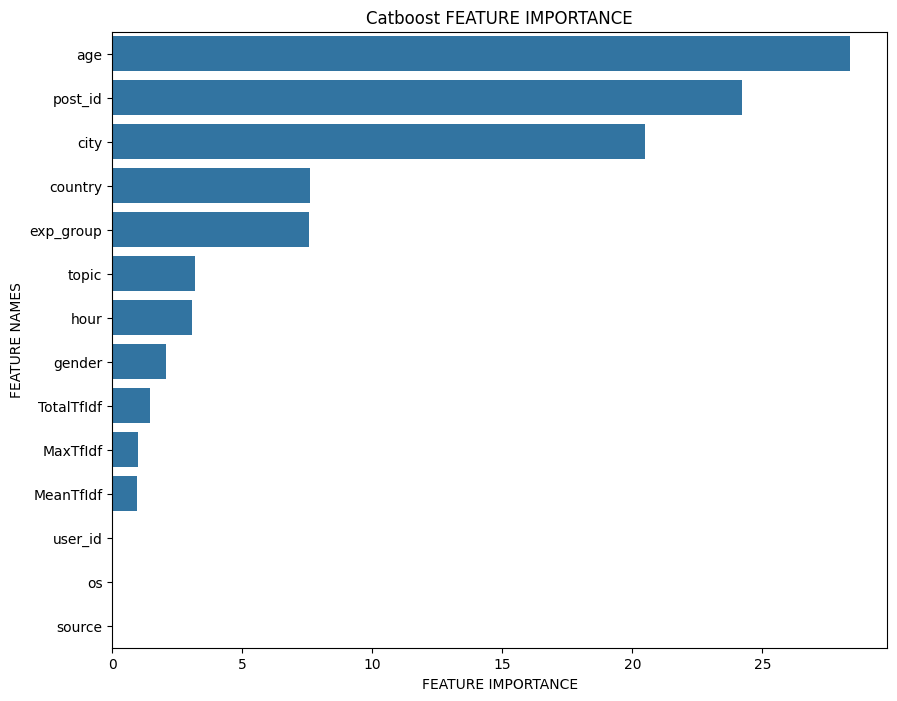

In [28]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
plot_feature_importance(catboost.feature_importances_,X_train.columns,'Catboost')

In [29]:
#catboost.save_model('catboost_model', format="cbm")